In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 正态分布检验
## 数据生成

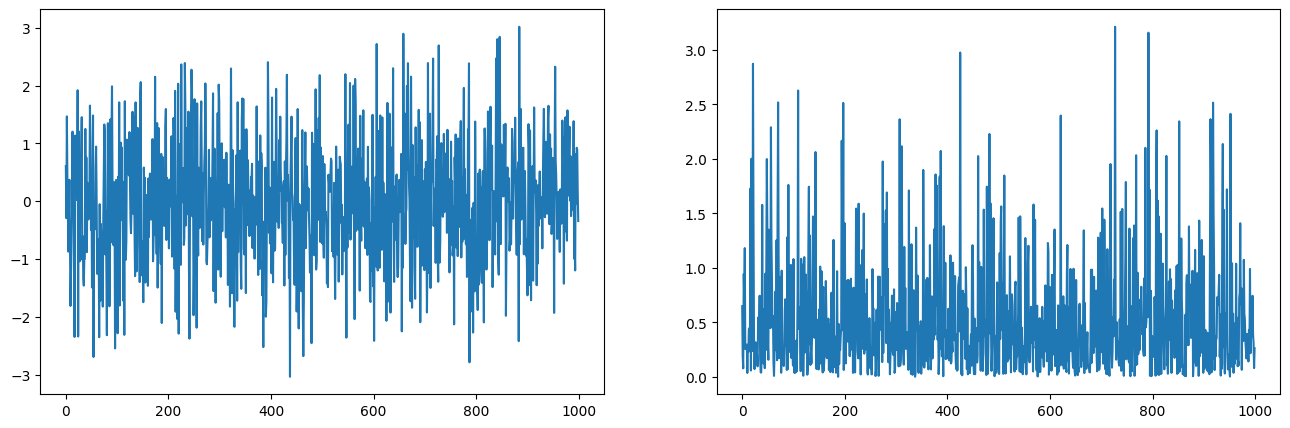

In [2]:
# 生成正态分布数据和其他分布数据
np.random.seed(6666)
data_normal = np.random.normal(loc=0.0, scale=1.0, size=1000)
data_unknow = np.random.exponential(0.5,1000)
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,5))
ax[0].plot(data_normal)
ax[1].plot(data_unknow)

## 散点图/直方图

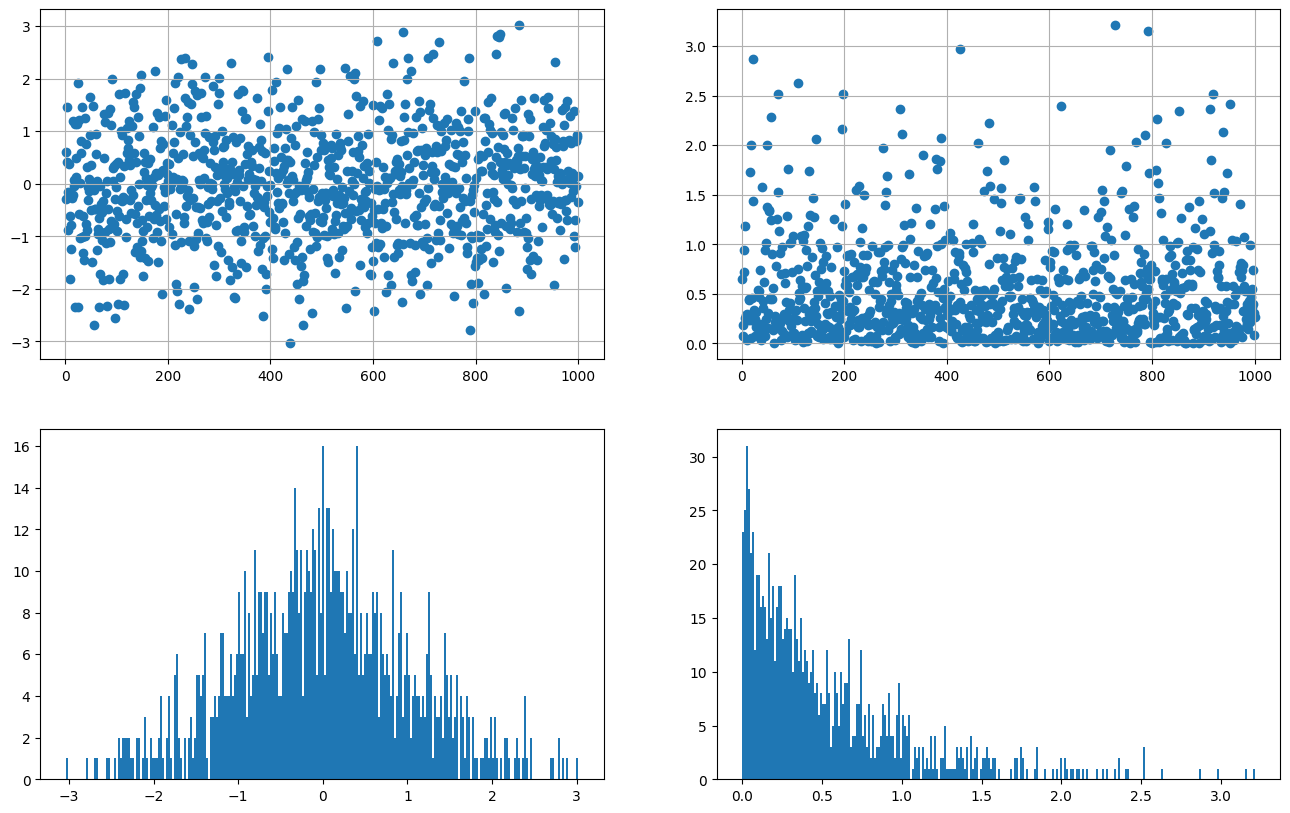

In [3]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,10))
# x轴坐标
index = np.arange(1,len(data_normal)+1,1)
# 绘制散点图
ax[0,0].scatter(index, data_normal)
ax[0,0].grid()
ax[0,1].scatter(index, data_unknow)
ax[0,1].grid()

# 绘制直方图
# 直方图可以很好地观察数据的分布否具有正态性
n1, bins1, patches1 = ax[1,0].hist(data_normal,bins=256)
n2, bins2, patches2 = ax[1,1].hist(data_unknow,bins=256)

## QQ图（Quantile-Quantile Plot）
- QQ图通过把测试样本数据的分位数与已知分布相比较，从而来检验：
    1. 两组数据是否来自同一分布
    2. 两组数据的尺度范围是否一致
    3. 两组数据是否有类似的分布形状
- 前面两个问题可以用样本数据集在Q-Q图上的点与参考线的距离判断；而后者则是用点的拟合线的斜率判断
- QQ图是一种散点图，对应于正态分布的QQ图，就是由**标准正态分布的分位数**为横坐标，**样本值的分位数**为纵坐标的散点图
  - 若两样本分布相同，则散点图中的点在y=x附近。
  - 若样本数据近似于正态分布，在QQ图上这些点近似的在直线$y=\sigma x + \mu$上，此直线的斜率是标准差$\sigma$，截距为均值$\mu$。
  - 所以，利用QQ图可以作直观的正态性检验。若QQ图上的点近似的在一条直线上，可以认为样本数据来自正态总体。

In [4]:
#  计算均值，标准差
mean_normal = np.mean(data_normal)
std_normal = np.std(data_normal)

mean_unknow = np.mean(data_unknow)
std_unknow = np.std(data_unknow)

# 重新排序
data_normal = np.sort(data_normal)
data_unknow = np.sort(data_unknow)

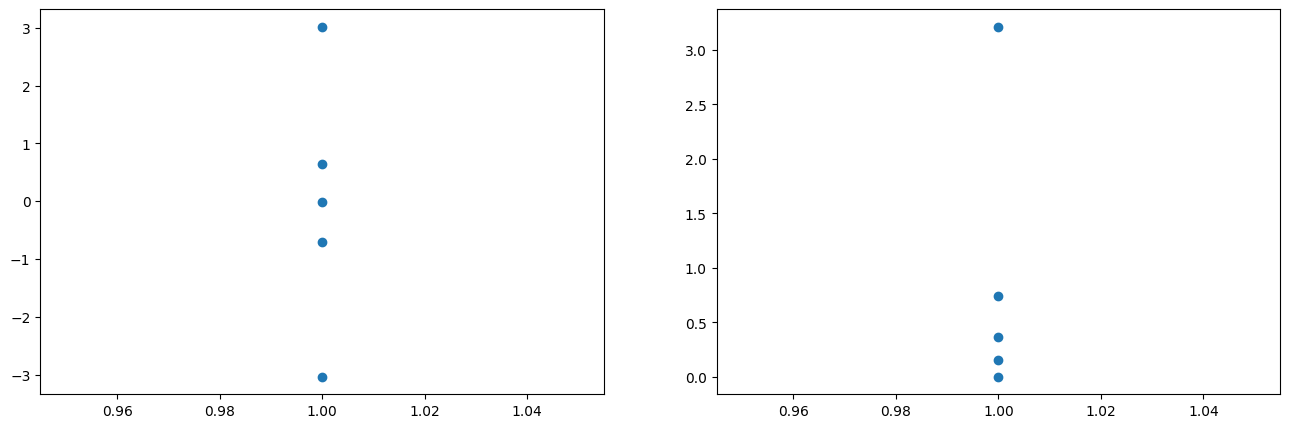

In [5]:
# 四分位数，将这组数据划分为等量的四部分
## 0% 25% 50% 75% 100%
y_normal = np.quantile(data_normal, np.linspace(0,1,5))
y_unknow = np.quantile(data_unknow, np.linspace(0,1,5))

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,5))
ax[0].scatter(np.ones_like(y_normal), y_normal)
ax[1].scatter(np.ones_like(y_unknow), y_unknow)

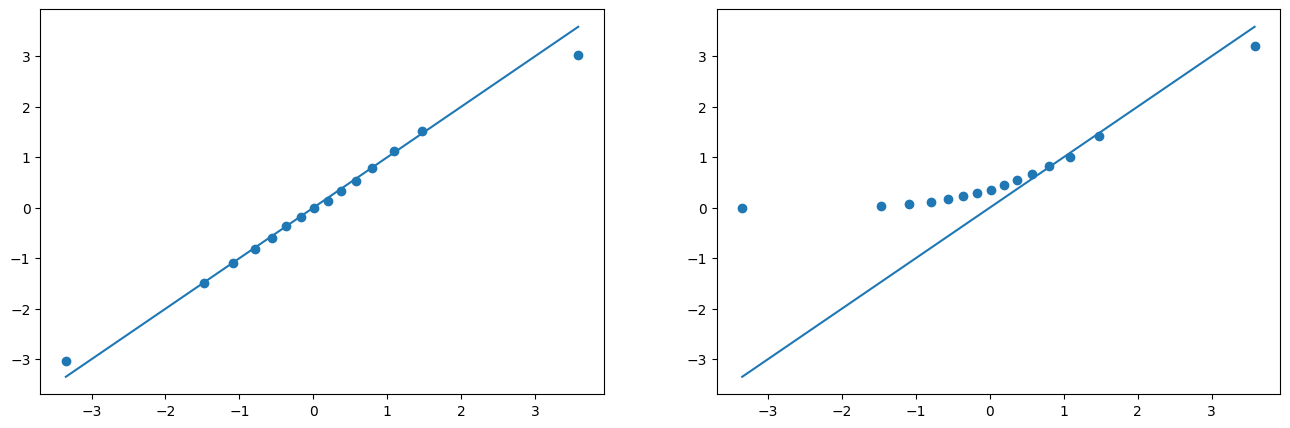

In [6]:
# 绘制QQ图，检测两组样本是否满足正态分布
y_test = np.random.normal(loc=0.0, scale=1.0, size=10000)
y_test = np.quantile(y_test, np.linspace(0,1,15))
y_normal = np.quantile(data_normal, np.linspace(0,1,15))
y_unknow = np.quantile(data_unknow, np.linspace(0,1,15))

# 指定直线方程 sigma=0 mu=1
x = np.linspace(np.min(y_test),np.max(y_test),100)
y = x
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,5))
ax[0].scatter(y_test, y_normal)
ax[0].plot(x,y)

x = np.linspace(np.min(y_test),np.max(y_test),100)
y = x
ax[1].scatter(y_test, y_unknow)
ax[1].plot(x,y)

## JB检验(大样本 n>30)
- 雅克-贝拉检验（Jarque-Bera Test）
- $H_{0}$：该变量服从正态分布
- $H_{1}$：该变量不服从正态分布

In [9]:
from scipy import stats
# Statstic: 代表显著性水平
# P: 代表概率论与数理统计中的P值
# 对正态样本进行检验
jarque_bera_test = stats.jarque_bera(y_normal)
print("JB Test Statstic:{}   Pvalue:{}".format(jarque_bera_test.statistic,jarque_bera_test.pvalue))

# 对随机样本进行检验
jarque_bera_test = stats.jarque_bera(y_unknow)
print("JB Test Statstic:{}   Pvalue:{}".format(jarque_bera_test.statistic,jarque_bera_test.pvalue))

JB Test Statstic:0.2350911094768697   Pvalue:0.889100008105577
JB Test Statstic:27.333738405783752   Pvalue:1.1602567943664482e-06


## Shapior-wilk检验(小样本 3<n<50)
- Shapior检验主要应用于小样本的情况下，即在样本量在3到50之间的时候进行的检验。
- $H_{0}$：该变量服从正态分布
- $H_{1}$：该变量不服从正态分布

In [100]:
from scipy import stats
# Statstic: 代表显著性水平
# P: 代表概率论与数理统计中的P值
# 对正态样本进行检验
shapiro_test = stats.shapiro(y_normal)
print("Shapiro wilk Test Statstic:{}   Pvalue:{}".format(shapiro_test.statistic,shapiro_test.pvalue))

# 对随机样本进行检验
shapiro_test = stats.shapiro(y_unknow)
print("Shapiro wilk Test Statstic:{}   Pvalue:{}".format(shapiro_test.statistic,shapiro_test.pvalue))

Shapiro wilk Test Statstic:0.9800272583961487   Pvalue:0.969688355922699
Shapiro wilk Test Statstic:0.7072978019714355   Pvalue:0.00029775628354400396


## KS检验(Kolmogorov-Smirnov)
- KS检验是比较一个频率分布f(x)与理论分布g(x)或者两个观测值分布的检验方法。
- $H_{0}$：两个数据分布一致或者数据符合理论分布
- $H_{1}$：两个数据分布不一致或者数据不符合理论分布

In [101]:
# 对正态样本进行检验
KstestResult = stats.ks_2samp(y_normal, y_normal)
print("KS Test Statstic:{}   Pvalue:{}".format(KstestResult.statistic,KstestResult.pvalue))
# 100%的可能性一致

# 对随机样本进行检验
KstestResult = stats.ks_2samp(y_unknow, y_normal)
print("KS Test Statstic:{}   Pvalue:{}".format(KstestResult.statistic,KstestResult.pvalue))
# 0.02的可能性一致

KS Test Statstic:0.0   Pvalue:1.0
KS Test Statstic:0.5333333333333333   Pvalue:0.026248485664288602
